In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
data_path = r"D:\DANE - Contrato\2024\Operativo Barrido\Data"

In [27]:
emicron = pd.read_csv(os.path.join(data_path,"emicron_establecimientos.csv"),header = 0)
emicron_mov = pd.read_csv(os.path.join(data_path,"emicron_moviles.csv"),header = 0)
emicron22_or = pd.read_csv(os.path.join(data_path,"EMICRON_22.csv"),header = 0)
emicron22_raw = pd.read_csv(os.path.join(data_path,"emicron_22_raw.csv"),header = 0)
emicron22 = emicron[emicron['OLA']==2022]
emicron22.columns

C:\Users\carlo\AppData\Local\Temp\ipykernel_29804\175987740.py:4: DtypeWarning: Columns (41,42,43,44,45,59,60,71,72,90,102,104,106,116,117,132,133,134,135,136,137,140,141,143,157) have mixed types. Specify dtype option on import or set low_memory=False.
  emicron22_raw = pd.read_csv(os.path.join(data_path,"emicron_22_raw.csv"),header = 0)


Index(['id', 'VENTAS_MES_ANTERIOR', 'POTTOT', 'REMUNERACION_TOTAL', 'CYG',
       'COD_DEPTO', 'CPAM', 'GRUPOS4', 'UBICA', 'IDRUT', 'REG_CONT',
       'CAMCOMER', 'OLA', 'F_EXP'],
      dtype='object')

In [28]:
emicron22_raw['GRUPOS12'] = emicron22_raw['GRUPOS12'].apply(lambda x: float(x.strip('b').strip("'")))
emicron22_raw['MPIO'] = emicron22_raw['MPIO'].apply(lambda x: float(x.strip('b').strip("'")))

In [29]:
emicron22 = pd.merge(emicron22, emicron22_raw[['id','GRUPOS12','MPIO','CIIU_3']], on='id')
emicron22_mov = pd.merge(emicron_mov, emicron22_raw[['id','GRUPOS12','MPIO','CIIU_3']], on='id')

In [19]:
#709931012,719970511,701645411,722225111,717019212
emicron22[emicron22['id'].isin([709931012,719970511,701645411,722225111,717019212])]

,id,VENTAS_MES_ANTERIOR,POTTOT,REMUNERACION_TOTAL,CYG,COD_DEPTO,CPAM,GRUPOS4,UBICA,IDRUT,REG_CONT,CAMCOMER,OLA,F_EXP,GRUPOS12,MPIO,CIIU_3
6994,701645411,800000,4.0,6450000.0,8345664,88,1,4,1,1,3,1,2022,3.227870,7.0,88001.0,5611.0
11917,709931012,2300000,1.0,2024444.0,227385000,68,1,3,1,1,3,1,2022,15.365880,5.0,68001.0,4620.0
16233,717019212,2107142,5.0,16349757.0,1389367,5,1,3,1,1,2,1,2022,110.399309,5.0,5001.0,4711.0
18208,719970511,2100000,0.0,290000.0,95730000,11,1,2,1,1,1,1,2022,338.702008,3.0,11001.0,3110.0
19589,722225111,2833333,7.0,16344500.0,26239589,88,1,3,1,1,1,1,2022,2.564092,5.0,88001.0,4719.0


In [31]:
#703421912,725086714,501679311,503676711,504677611
emicron22_mov[emicron22_mov['id'].isin([703421912,725086714,501679311,503676711,504677611])]

,id,VENTAS_MES_ANTERIOR,POTTOT,REMUNERACION_TOTAL,CYG,COD_DEPTO,CPAM,GRUPOS4,ANOS_ESPACIO,OLA,F_EXP,GRUPOS12,MPIO,CIIU_3
440,501679311,285333,0.0,0.0,1554000,19,1,2,2,2022,10.218199,3.0,19001.0,1081.0
594,503676711,5000000,4.0,7385000.0,2870000,66,1,4,5,2022,21.756514,7.0,66001.0,5619.0
693,504677611,7760000,3.0,30194112.0,2244000,5,1,3,5,2022,78.803405,5.0,5001.0,4520.0
1126,703421912,5100000,0.0,0.0,51306000,52,1,3,5,2022,11.101709,5.0,52001.0,4721.0
2943,725086714,320000,0.0,0.0,2902000,27,1,3,5,2022,2.873566,5.0,27001.0,4781.0


In [9]:
# Definición labels
dic_depto = {5:"Antioquia",8:"Atlántico",11:"Bogotá, D. C.",13:"Bolívar",15:"Boyacá",17:"Caldas",18:"Caquetá",
             19:"Cauca",20:"Cesar",23:"Córdoba",25:"Cundinamarca",27:"Chocó",41:"Huila",44:"La Guajira",47:"Magdalena",
             50:"Meta",52:"Nariño",54:"Norte De Santander",63:"Quindío",66:"Risaralda",68:"Santander",70:"Sucre",73:"Tolima",
             76:"Valle Del Cauca",88:"San Andrés"}

dic_sector = {2:"Industria",3:"Comercio",4:"Servicios"}

dic_rut = {1:"Sí",0:"No"}

dic_g12 = {3:"Industria",
           4:"Construcción",
           5:"Comercio",
           6:"Transporte y almacenamiento",
           7:"Alojamiento/servicios de comida",
           8:"Información y comunicaciones",
           9:"Actividades inmobiliarias",
           10:"Educación",
           11:"Actividades de salud humana",
           12:"Actividades artiísticas",
}


# Definiendo rampa de colores de acuerdo con imagen institucional
def create_custom_cmap(colors):
    cmap = ListedColormap(colors)
    return cmap

colors2 = ['#E3207B', '#BA1A65', '#8C144C', '#690F39']  # Rampa de colores
custom_cmap2 = create_custom_cmap(colors2) # no incluye el último color negro

### Sector Económico

In [43]:
cross_tab_prop = pd.crosstab(emicron22['COD_DEPTO'],
                             emicron22['GRUPOS4'],
                             emicron22['F_EXP'],
                             aggfunc=sum,
                             normalize= "index")

cross_tab_prop = cross_tab_prop[[3,4,2]]
cross_tab_prop = cross_tab_prop.sort_values(by = 3, ascending=False)

cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

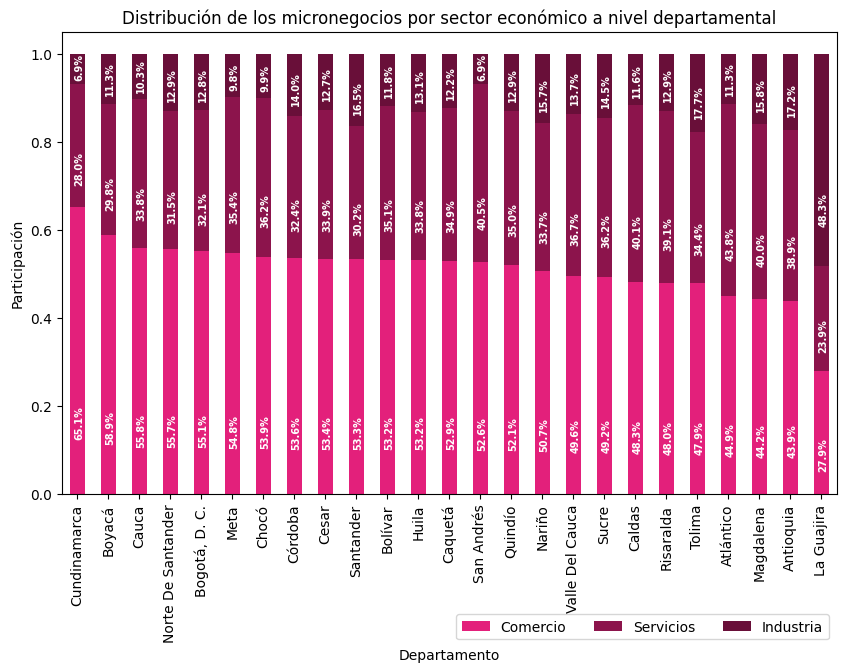

In [54]:

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("Distribución de los micronegocios por sector económico a nivel departamental")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 5),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical',
                 fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.5, -0.33),
          fancybox=True, shadow=False, ncol=5)

plt.show()

In [12]:
cross_tab_prop = pd.crosstab(emicron22['COD_DEPTO'],
                             emicron22['GRUPOS12'],
                             emicron22['F_EXP'],
                             aggfunc=sum,
                             normalize= "index")

cross_tab_prop = cross_tab_prop[[5,4,6,7,8,9,10,11,12,3]]
cross_tab_prop = cross_tab_prop.sort_values(by = 5, ascending=False)

cross_tab_prop.rename(columns=dic_g12,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

cross_tab_prop

cross_tab_prop.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\grupos12_comp.xlsx",index=True)

In [13]:
pd.crosstab(index=emicron22['GRUPOS4'],
                             columns=emicron22['GRUPOS12'])

GRUPOS12,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
GRUPOS4,,,,,,,,,,
2,3286,0,0,0,0,0,0,0,0,0
3,0,0,11064,0,0,0,0,0,0,0
4,0,80,0,107,3303,186,1135,168,426,3027


### Formalidad

#### Cámara de comercio

In [58]:
cross_tab_prop = pd.crosstab(emicron22['COD_DEPTO'],
                             emicron22['CAMCOMER'],
                             emicron22['F_EXP'],
                             aggfunc=sum,
                             normalize= "index")
cross_tab_prop = cross_tab_prop[[1,0]]
cross_tab_prop = cross_tab_prop.sort_values(by = 1, ascending=False)
cross_tab_prop

cross_tab_prop.rename(columns=dic_rut,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

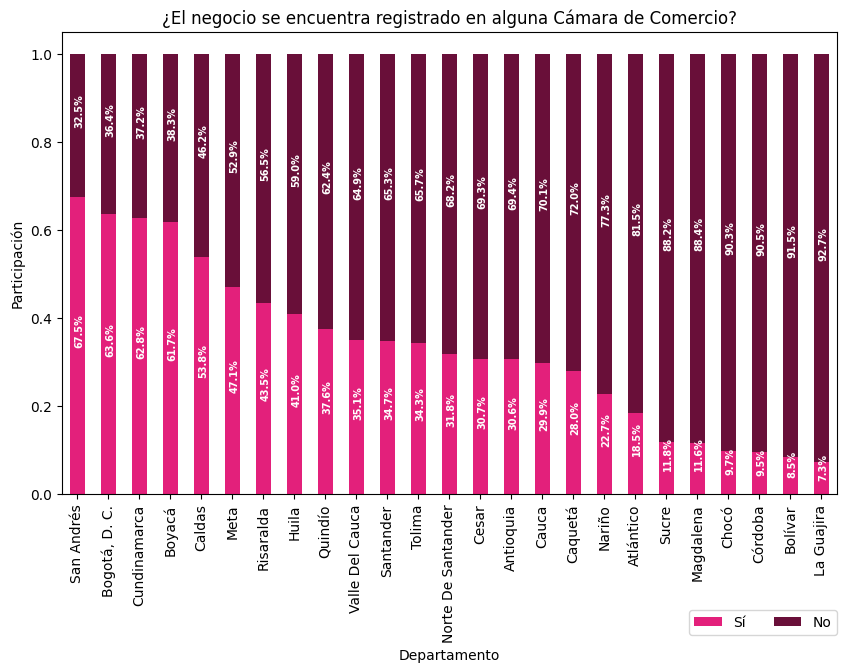

In [59]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("¿El negocio se encuentra registrado en alguna Cámara de Comercio?")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical',
                 fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

#### RUT

In [60]:
cross_tab_prop = pd.crosstab(emicron22['COD_DEPTO'],
                             emicron22['IDRUT'],
                             emicron22['F_EXP'],
                             aggfunc=sum,
                             normalize= "index")

cross_tab_prop = cross_tab_prop[[1,0]]
cross_tab_prop = cross_tab_prop.sort_values(by = 1, ascending=False)

cross_tab_prop.rename(columns=dic_rut,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)

cross_tab_prop

IDRUT,Sí,No
COD_DEPTO,,
"Bogotá, D. C.",0.814002,0.185998
San Andrés,0.745322,0.254678
Cundinamarca,0.743852,0.256148
Boyacá,0.712908,0.287092
Caldas,0.677198,0.322802
Quindío,0.601584,0.398416
Meta,0.555991,0.444009
Huila,0.555800,0.444200
Risaralda,0.547049,0.452951


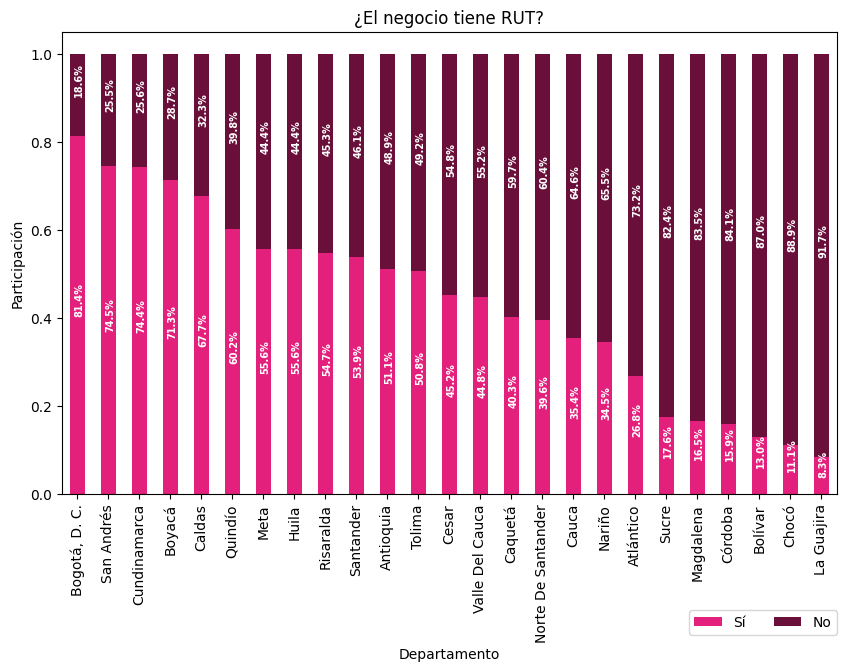

In [61]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("¿El negocio tiene RUT?")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical'
                 ,fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

### Ingresos

NameError: name 'q3' is not defined

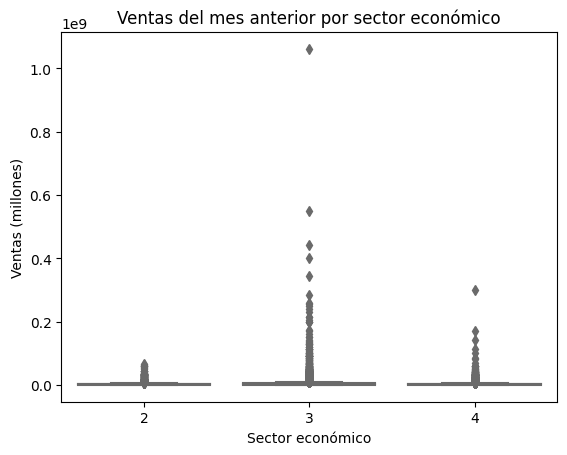

In [18]:
#q1,q3 = emicron22['VENTAS_MES_ANTERIOR'].describe()[[4,6]]
#emicron22_aco = emicron22[emicron22['VENTAS_MES_ANTERIOR'] < q3 + 1.5*(q3-q1)]
#emicron22_aco["GRUPOS4"] = emicron22_aco["GRUPOS4"].map(dic_sector)

# sns.boxplot(x = 'GRUPOS4', y = 'VENTAS_MES_ANTERIOR', data = emicron22,
#             palette= sns.color_palette("Set3"))
# plt.title("Ventas del mes anterior por sector económico")
# plt.ylabel("Ventas (millones)")
# plt.xlabel("Sector económico")
# plt.ylim((0, q3 + 1.5*(q3-q1)))

(0.0, 8000.0)

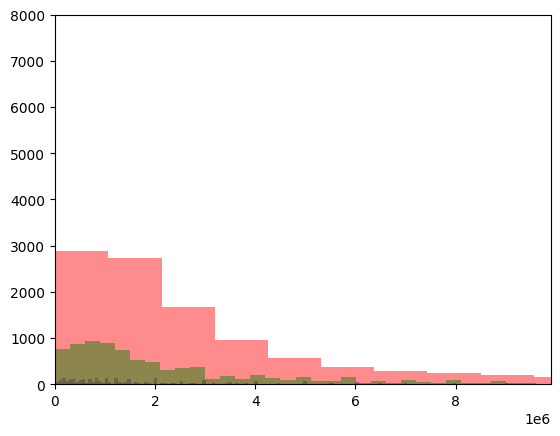

In [ ]:
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==2], bins= 1000, alpha = 0.45, color = 'blue')
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==3], bins= 1000, alpha = 0.45, color = 'red')
plt.hist('VENTAS_MES_ANTERIOR', data = emicron22[emicron22['GRUPOS4']==4], bins= 1000, alpha = 0.45, color = 'green')
plt.xlim((0,q3 + 2*(q3-q1)))
plt.ylim((0,8000))

(array([[9.5630e+03, 9.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00],
        [3.2133e+04, 1.1900e+02, 2.2000e+01, 7.0000e+00, 3.0000e+00,
         2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00],
        [2.5192e+04, 1.4000e+01, 2.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00]]),
 array([2.00000000e+03, 8.84542142e+07, 1.76906428e+08, 2.65358643e+08,
        3.53810857e+08, 4.42263071e+08, 5.30715286e+08, 6.19167500e+08,
        7.07619714e+08, 7.96071928e+08, 8.84524142e+08, 9.72976357e+08,
        1.06142857e+09]),
 <a list of 3 BarContainer objects>)

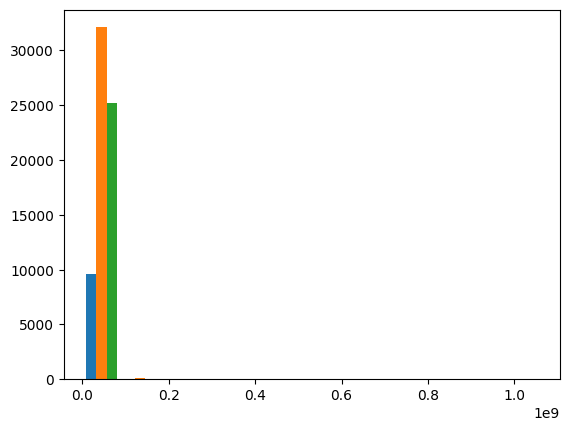

In [ ]:
x1 = list(emicron[emicron['GRUPOS4'] == 2]['VENTAS_MES_ANTERIOR'])
x2 = list(emicron[emicron['GRUPOS4'] == 3]['VENTAS_MES_ANTERIOR'])
x3 = list(emicron[emicron['GRUPOS4'] == 4]['VENTAS_MES_ANTERIOR'])

plt.hist([x1, x2, x3], bins = int(180/15))

C:\Users\carlo\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VENTAS_MES_ANTERIOR', ylabel='Density'>

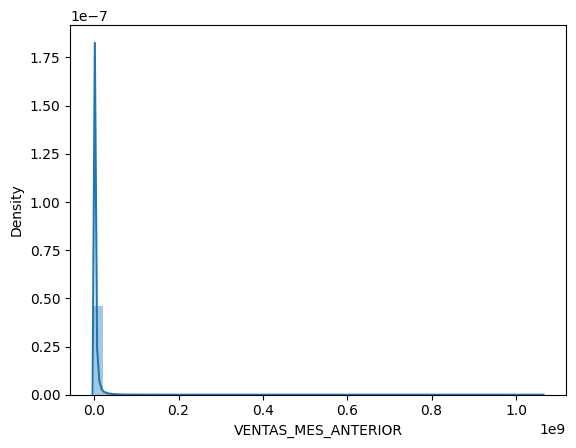

In [ ]:
sns.distplot(emicron['VENTAS_MES_ANTERIOR'], norm_hist= True, hist=True, kde=True, label = emicron22["GRUPOS4"])

In [ ]:
# Ventas mensuales
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VENTAS_MES_ANTERIOR'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Ventas_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   3.146858e+06  5.255649e+06  3.071800e+06
std    6.454845e+06  1.804048e+07  5.414714e+06
min    4.000000e+03  6.000000e+03  2.000000e+04
25%    8.000000e+05  1.000000e+06  6.500000e+05
50%    1.560000e+06  2.100000e+06  1.400000e+06
75%    3.300000e+06  4.500000e+06  3.250000e+06
max    3.000000e+08  1.061429e+09  6.500000e+07


In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
# Ventas mensuales
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    dwf = DescrStatsW(emicron22['VENTAS_MES_ANTERIOR'][emicron22['GRUPOS4'] == est], weights=emicron22['F_EXP'][emicron22['GRUPOS4'] == est], ddof=1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Ventas_sector.xlsx")

               Servicios      Comercio     Industria
Promedio    3.441388e+06  5.682705e+06  3.564232e+06
Desviacion  5.650232e+06  1.502868e+07  6.014124e+06
Minimo      4.000000e+03  6.000000e+03  2.000000e+04
1 cuartil   8.292300e+05  1.100000e+06  6.000000e+05
Mediana     1.800000e+06  2.426761e+06  1.500000e+06
3 cuartil   4.000000e+06  5.200000e+06  3.900000e+06
Maximo      3.000000e+08  1.061429e+09  6.500000e+07


### Personal empleado

In [62]:
# Personal empleado
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['POTTOT'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Personal_sector.xlsx")

         Servicios      Comercio    Industria
count  8432.000000  11064.000000  3286.000000
mean      0.534037      0.437545     0.542909
std       1.051076      0.860454     1.067786
min       0.000000      0.000000     0.000000
25%       0.000000      0.000000     0.000000
50%       0.000000      0.000000     0.000000
75%       1.000000      1.000000     1.000000
max       8.000000      8.000000     8.000000


In [ ]:
# Personal empleado
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    dwf = DescrStatsW(emicron22['POTTOT'][emicron22['GRUPOS4'] == est], weights=emicron22['F_EXP'][emicron22['GRUPOS4'] == est], ddof=1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Personal_sector.xlsx")

            Servicios  Comercio  Industria
Promedio     0.660253  0.481886   0.636087
Desviacion   1.189256  0.879682   1.149665
Minimo       0.000000  0.000000   0.000000
1 cuartil    0.000000  0.000000   0.000000
Mediana      0.000000  0.000000   0.000000
3 cuartil    1.000000  1.000000   1.000000
Maximo       8.000000  8.000000   8.000000


In [ ]:
emicron22_or[['P3032_1','P3032_2','P3032_3']].sum(axis=1).value_counts()

0.0    69736
1.0    10182
2.0     2822
3.0     1061
4.0      464
5.0      240
6.0      139
8.0       56
7.0       53
dtype: int64

In [63]:
cross_tab_prop = pd.crosstab(emicron22['POTTOT'],
                             emicron22['GRUPOS4'],
                             emicron22['F_EXP'],
                             aggfunc=sum,
                             normalize= "columns")

cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop = cross_tab_prop*100
cross_tab_prop['Empleados'] = cross_tab_prop.index
cross_tab_prop

GRUPOS4,Industria,Comercio,Servicios,Empleados
POTTOT,,,,
0.0,65.091790,67.098503,64.149449,0.0
1.0,19.821034,23.753936,20.416542,1.0
2.0,8.236553,5.656305,8.005664,2.0
3.0,3.399943,2.076444,3.838464,3.0
4.0,1.483972,0.760952,1.836204,4.0
5.0,1.229509,0.315879,0.873897,5.0
6.0,0.299317,0.175161,0.282660,6.0
7.0,0.267663,0.084020,0.105159,7.0
8.0,0.170220,0.078799,0.491961,8.0


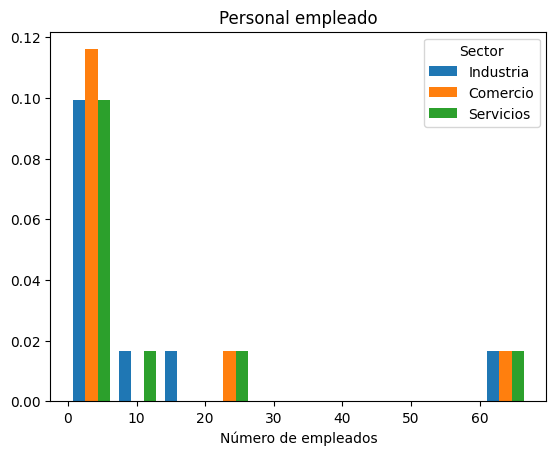

In [ ]:
colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), 
          (1.0, 1.0, 0.7019607843137254), 
          (0.7450980392156863, 0.7294117647058823, 0.8549019607843137)]

plt.hist([cross_tab_prop['Industria'].T,
          cross_tab_prop['Comercio'],
          cross_tab_prop['Servicios']])

plt.title("Personal empleado")
plt.xlabel("Número de empleados")

legend = plt.legend(['Industria',  
            'Comercio',
            'Servicios']) 
legend.set_title('Sector')
plt.show()

Text(0.5, 0, 'Número de empleados')

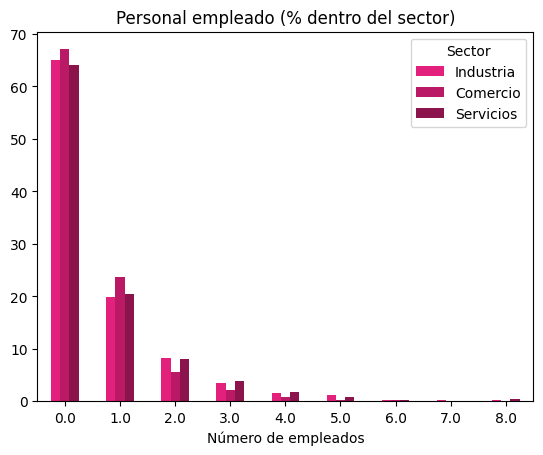

In [68]:
#colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), 
#          (1.0, 1.0, 0.7019607843137254), 
#          (0.7450980392156863, 0.7294117647058823, 0.8549019607843137)]
colors = ['#E3207B', '#BA1A65', '#8C144C']
#,'#690F39'

cross_tab_prop.plot(x="Empleados", y=["Industria", "Comercio", "Servicios"], kind="bar", rot=0,
                    color = colors)
plt.legend().set_title("Sector")
plt.title("Personal empleado (% dentro del sector)")
plt.xlabel("Número de empleados")

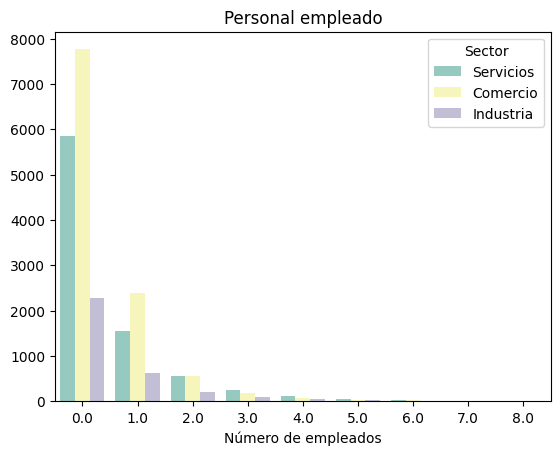

In [ ]:
emicron22_c =  emicron22.copy()
emicron22_c['GRUPOS4'] = emicron22_c['GRUPOS4'].map(dic_sector)

sns.countplot(x='POTTOT',hue='GRUPOS4', data= emicron22_c, palette= 'Set3')
plt.title("Personal empleado")
plt.xlabel("Número de empleados")
plt.ylabel("")
plt.legend()

legend = plt.legend()
legend.set_title('Sector')

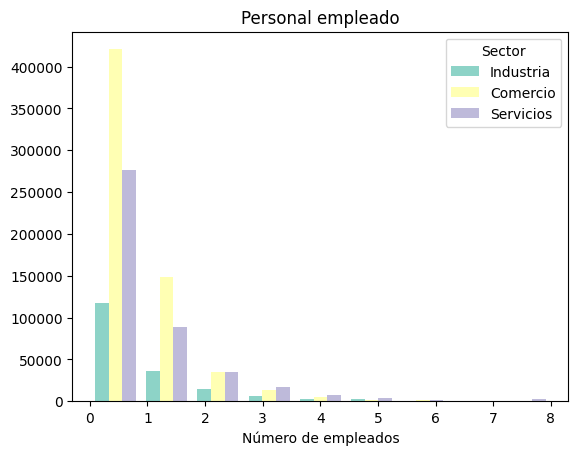

In [ ]:
colors = [(0.5529411764705883, 0.8274509803921568, 0.7803921568627451), 
          (1.0, 1.0, 0.7019607843137254), 
          (0.7450980392156863, 0.7294117647058823, 0.8549019607843137)]

plt.hist([emicron22['POTTOT'][emicron22['GRUPOS4']==2],
          emicron22['POTTOT'][emicron22['GRUPOS4']==3],
          emicron22['POTTOT'][emicron22['GRUPOS4']==4]], bins=9, 
          weights=[emicron22['F_EXP'][emicron22['GRUPOS4']==2],
                   emicron22['F_EXP'][emicron22['GRUPOS4']==3],
                   emicron22['F_EXP'][emicron22['GRUPOS4']==4]],
                   color=colors)

plt.title("Personal empleado")
plt.xlabel("Número de empleados")

legend = plt.legend(['Industria',  
            'Comercio',
            'Servicios']) 
legend.set_title('Sector')
plt.show()

In [ ]:
pd.crosstab

TypeError: bar() missing 1 required positional argument: 'height'

### Costos y Gastos

In [ ]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['CYG'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Costosygastos_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.779523e+06  3.842308e+06  1.998841e+06
std    3.590068e+06  1.370946e+07  7.241953e+06
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.817500e+05  5.400000e+05  2.242500e+05
50%    7.563890e+05  1.320000e+06  6.400000e+05
75%    1.840179e+06  3.160000e+06  1.981500e+06
max    1.149610e+08  7.709100e+08  3.218160e+08


In [ ]:
emicron22['id'][emicron22['CYG']==4000]

8344     703918711
14582    714612412
15831    716461412
17072    718285512
17261    718607711
18142    719867511
Name: id, dtype: int64

In [ ]:
emicron22_or[emicron22_or['id']==703918711]

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,COD_DEPTO,AREA,CLASE_TE,P35,P241,MES_REF,P3031,...,P3014,P1573_1,P1573_2,P1573_3,P1573_4,P1573_5,P1573_6,P1574,P1771,OLA
30168,7039187,1,1,15,NaN,1,2,65,MAYO,2,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2022


### Remuneración Total

In [ ]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['REMUNERACION_TOTAL'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Remuneracion_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   4.264664e+05  3.064110e+05  4.623640e+05
std    1.331620e+06  1.149434e+06  1.527814e+06
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00
75%    2.400000e+05  0.000000e+00  1.100000e+05
max    2.386000e+07  2.272657e+07  2.354716e+07


### Valor agregado

In [19]:
emicron22['VA'] = emicron22['VENTAS_MES_ANTERIOR'] - emicron22['CYG']
emicron22['VA_rel'] = emicron22['VA'] / emicron22['VENTAS_MES_ANTERIOR']
emicron22['VA_pro'] = emicron22['VA'] / (emicron22['CYG']+1)

In [22]:
emicron22[emicron22['VA']<0].shape

(1130, 20)

In [23]:
emicron22.shape

(22782, 20)

In [9]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.367335e+06  1.413340e+06  1.072959e+06
std    4.294435e+06  7.330191e+06  6.522551e+06
min   -3.358500e+07 -2.250850e+08 -3.128160e+08
25%    3.200000e+05  2.970000e+05  2.800000e+05
50%    7.200000e+05  7.180000e+05  6.970000e+05
75%    1.465000e+06  1.413793e+06  1.412859e+06
max    2.555000e+08  2.905186e+08  5.718000e+07


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA'>

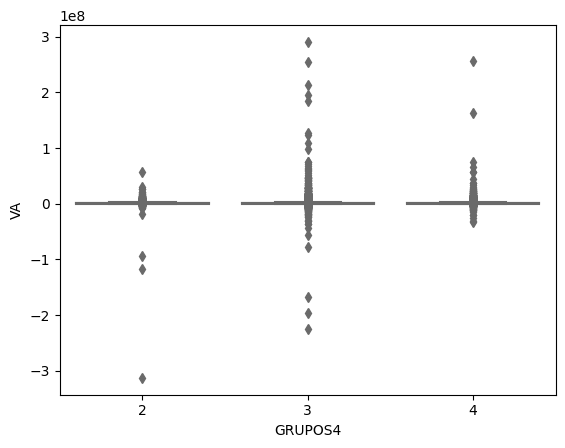

In [12]:
sns.boxplot(x = 'GRUPOS4', y = 'VA', data = emicron22,
            palette= sns.color_palette("Set3"))

In [10]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA_rel'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_rel_sector.xlsx")

         Servicios      Comercio    Industria
count  8432.000000  11064.000000  3286.000000
mean      0.425819      0.275046     0.383801
std       0.731570      1.310642     1.328423
min     -26.000000    -97.863043   -44.585714
25%       0.308826      0.199214     0.333333
50%       0.489160      0.333333     0.500000
75%       0.675000      0.485838     0.672000
max       1.000000      1.000000     1.000000


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA_rel'>

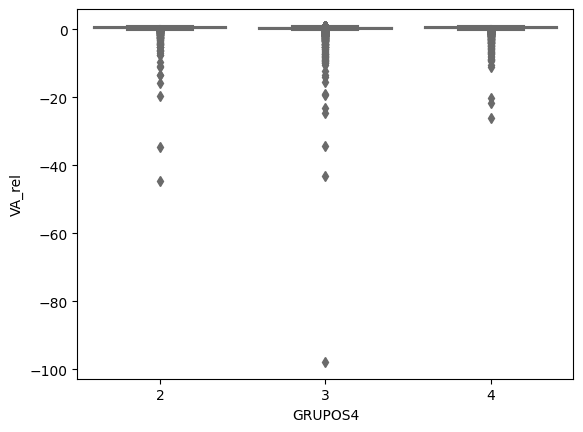

In [13]:
sns.boxplot(x = 'GRUPOS4', y = 'VA_rel', data = emicron22,
            palette= sns.color_palette("Set3"))

In [11]:
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    descriptions[est] = emicron22['VA_pro'][emicron22['GRUPOS4'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\VA_pro_sector.xlsx")

          Servicios      Comercio     Industria
count  8.432000e+03  1.106400e+04  3.286000e+03
mean   1.224101e+04  1.478057e+04  1.352585e+04
std    1.897225e+05  1.629483e+05  1.378914e+05
min   -9.629628e-01 -9.898850e-01 -9.780633e-01
25%    4.468138e-01  2.487730e-01  4.999998e-01
50%    9.575589e-01  4.999988e-01  9.999969e-01
75%    2.076917e+00  9.449103e-01  2.048777e+00
max    1.000000e+07  7.000000e+06  3.800000e+06


<AxesSubplot:xlabel='GRUPOS4', ylabel='VA_pro'>

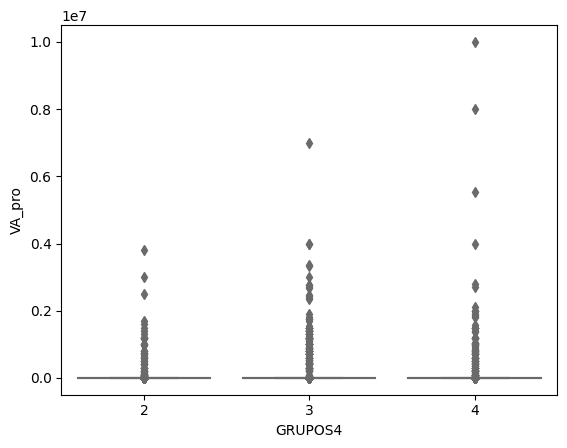

In [14]:
sns.boxplot(x = 'GRUPOS4', y = 'VA_pro', data = emicron22,
            palette= sns.color_palette("Set3"))

### Costos sobre ventas

In [127]:
emicron22['coef_g'] = emicron22['CYG'] / emicron22['VENTAS_MES_ANTERIOR']

In [128]:
# Coeficiente de costos y gastos sobre ventas
descriptions = {}

for est in emicron22['GRUPOS4'].unique():
    dwf = DescrStatsW(emicron22['coef_g'][emicron22['GRUPOS4'] == est], weights=emicron22['F_EXP'][emicron22['GRUPOS4'] == est], ddof=1) 
    n = {"Promedio" : dwf.mean ,
         "Desviacion" : dwf.std,
         "Minimo" : dwf.quantile([0])[0],
          "1 cuartil": dwf.quantile([0.25])[0.25],
          "Mediana" : dwf.quantile([0.5])[0.5],
          "3 cuartil": dwf.quantile([0.75])[0.75],
          "Maximo": dwf.quantile([1])[1]}
    
    descriptions[est] = n

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)

descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\Costos_ventas_sector.xlsx")

            Servicios   Comercio  Industria
Promedio     0.605890   0.737633   0.681387
Desviacion   0.701570   0.967428   2.109747
Minimo       0.000000   0.000000   0.000000
1 cuartil    0.367698   0.536480   0.342353
Mediana      0.545455   0.687273   0.510000
3 cuartil    0.722069   0.817500   0.676250
Maximo      27.000000  98.863043  45.585714


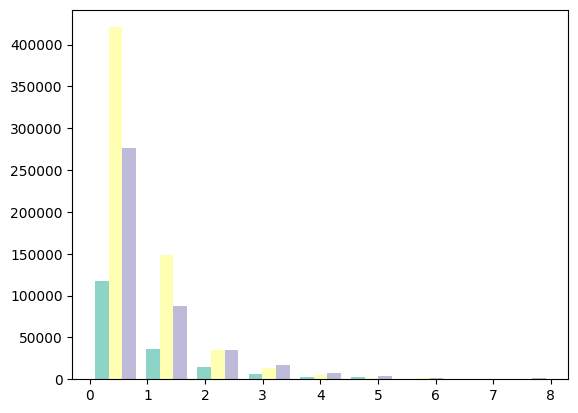

In [168]:
sns.color_palette("Set3",3)[2]

(0.7450980392156863, 0.7294117647058823, 0.8549019607843137)

In [138]:
help(plt.hist

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

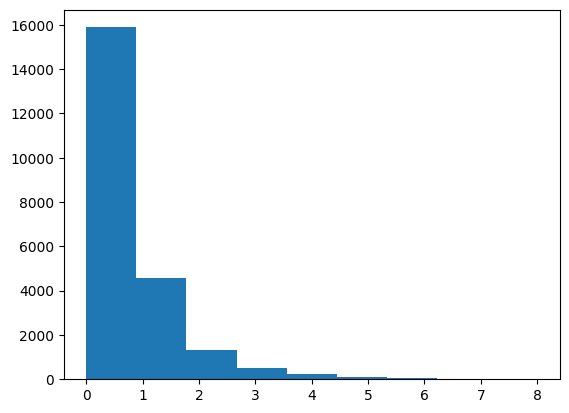

In [136]:
plt.hist(emicron22['POTTOT'], bins=9)
plt.show()

### Análisis de valores atípicos

#### Establecimientos

In [26]:
"D:\DANE - Contrato\2024\Operativo Barrido\Data\Resultados\cluster_atipico_establecimientos.xlsx"

'D:\\DANE - Contrato\x824\\Operativo Barrido\\Data\\Resultados\\cluster_atipico_establecimientos.xlsx'

In [3]:
estab_atpcs = pd.read_excel(os.path.join(data_path,"Resultados\cluster_atipico_establecimientos.xlsx"),header = 0)

In [12]:
estab_atpcs['COD_DEPTO'].value_counts()

Cesar                 473
Bogotá, D. C.         443
Valle Del Cauca       375
Cauca                 367
Antioquia             331
Cundinamarca          309
Magdalena             296
Santander             294
Nariño                285
Meta                  283
Atlántico             279
Caldas                275
Boyacá                261
Huila                 256
Sucre                 244
San Andrés            238
Norte De Santander    221
Chocó                 209
Caquetá               204
Quindío               202
Bolívar               201
Córdoba               196
Tolima                193
Risaralda             164
La Guajira            163
Name: COD_DEPTO, dtype: int64

In [4]:
estab_atpcs['VA'] = estab_atpcs['VENTAS_MES_ANTERIOR'] - estab_atpcs['CYG']
estab_atpcs['coef_g'] = estab_atpcs['CYG'] / estab_atpcs['VENTAS_MES_ANTERIOR']

In [5]:
estab_atpcs['nivel_atipico'].value_counts()

1    4137
2    1074
3     938
4     609
5       4
Name: nivel_atipico, dtype: int64

In [6]:
descriptions = {}

for est in estab_atpcs['cluster'].unique():
    descriptions[est] = estab_atpcs['VENTAS_MES_ANTERIOR'][estab_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\estab_ventas_clu_atpcs.xlsx")

                   0             1             2             3             4  \
count       0.937000      0.753000  1.075000e+00      0.539000      0.500000   
mean    12382.565147   2555.598428  1.993910e+04   3315.375635   2034.764366   
std     24779.974631   4229.132509  4.901302e+04   6755.250068   3362.420378   
min        50.000000     12.000000  6.000000e+01     11.000000     30.000000   
25%      3000.000000    600.000000  3.100000e+03    450.000000    500.000000   
50%      6500.000000   1200.000000  7.500000e+03   1000.000000    950.000000   
75%     13000.000000   2857.143000  2.000000e+04   2706.075000   2000.000000   
max    400000.000000  60000.000000  1.061429e+06  90000.000000  33000.000000   

                   5             6             7             8             9  
count       0.924000      0.575000      0.740000      0.406000      0.313000  
mean     9758.031556   7530.140737   4221.991464   2253.776081   2309.802773  
std     15647.351828   9016.715694   8175.

In [19]:
descriptions = {}

for est in estab_atpcs['cluster'].unique():
    descriptions[est] = estab_atpcs['CYG'][estab_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\estab_cyg_clu_atpcs.xlsx")

                   0             1              2             3  \
count       0.937000      0.753000       1.075000      0.539000   
mean     9245.149759   1444.211231   14958.560995   2500.210417   
std     18837.382431   2437.015563   36993.735410   5568.616752   
min         4.000000      0.000000      87.000000      0.000000   
25%      1860.000000    230.000000    2354.829500    250.000000   
50%      4271.000000    580.000000    5975.000000    610.000000   
75%      9410.000000   1602.000000   15907.000000   1780.959500   
max    224076.000000  30260.000000  770910.000000  72710.000000   

                   4              5             6             7             8  \
count       0.500000       0.924000       0.57500      0.740000      0.406000   
mean     1364.880296    5589.777419    5399.13688   3095.488527   1332.276365   
std      5943.833367    7981.675631   15143.70937   7218.071737   2804.722842   
min         0.000000       0.000000       0.00000      0.000000      0.0

In [21]:
descriptions = {}

for est in estab_atpcs['cluster'].unique():
    descriptions[est] = estab_atpcs['VA'][estab_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\estab_va_clu_atpcs.xlsx")

                   0             1              2             3  \
count       0.937000      0.753000       1.075000      0.539000   
mean     3137.415388   1111.387197    4980.543719    815.165217   
std     13020.579834   2848.875947   19228.061789   2284.121055   
min   -197076.000000  -9140.000000 -225085.000000 -22130.000000   
25%       700.000000    250.000000     618.000000    100.000000   
50%      1840.000000    590.000000    2210.000000    300.000000   
75%      3960.703000   1175.000000    5405.000000    816.000000   
max    194340.000000  56910.000000  290518.571000  24170.000000   

                   4              5              6             7  \
count       0.500000       0.924000       0.575000      0.740000   
mean      669.884070    4168.254137    2131.003857   1126.502936   
std      5572.009634   11608.715814   14409.049551   3576.044102   
min   -118125.000000  -33585.000000 -312816.000000 -55355.000000   
25%       240.000000     928.106000     753.000000    24

In [22]:
descriptions = {}

for est in estab_atpcs['cluster'].unique():
    descriptions[est] = estab_atpcs['coef_g'][estab_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
#descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\estab_coefg_clu_atpcs.xlsx")

                0           1            2           3           4  \
count  937.000000  753.000000  1075.000000  539.000000  500.000000   
mean     0.801619    0.604986     1.091902    0.703872    0.600737   
std      0.998118    0.710333     3.588827    0.548057    1.200022   
min      0.026667    0.000000     0.074617    0.000000    0.000000   
25%      0.562105    0.318182     0.577964    0.538750    0.269500   
50%      0.707318    0.540230     0.726295    0.709800    0.434891   
75%      0.829554    0.709677     0.866307    0.813516    0.626250   
max     16.467531   10.140000    98.863043   10.000000   20.687500   

                5           6           7           8           9  
count  924.000000  575.000000  740.000000  406.000000  313.000000  
mean     0.798936    0.906322    0.666410    0.534322    0.512746  
std      1.444802    2.618020    0.721367    0.324096    0.402829  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.381460    0.412904

In [7]:
# Abrir archivo
emicron_estab = pd.read_csv(os.path.join(data_path,"emicron_establecimientos.csv"),header = 0)
emicron_estab = emicron_estab[emicron_estab['OLA']==2022]

# Crear variable de si es atípico o no
emicron_estab['ATPC'] = emicron_estab['id'].isin(estab_atpcs['id'])

# Creación variables
emicron_estab['VA'] = emicron_estab['VENTAS_MES_ANTERIOR'] - emicron_estab['CYG']
emicron_estab['coef_g'] = emicron_estab['CYG'] / emicron_estab['VENTAS_MES_ANTERIOR']

Text(0.5, 0, '¿Es atípico?')

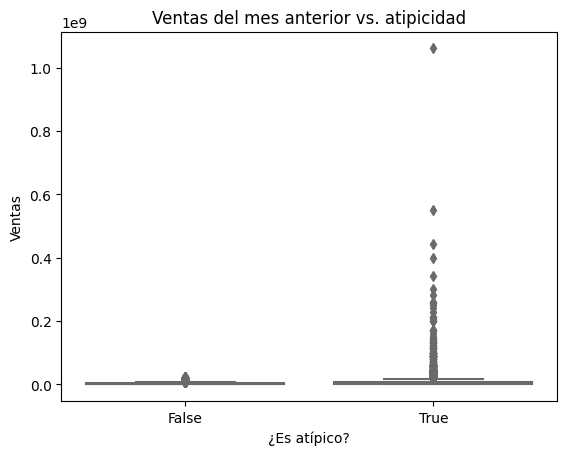

In [65]:
#q1,q3 = emicron22['VENTAS_MES_ANTERIOR'].describe()[[4,6]]
#emicron22_aco = emicron22[emicron22['VENTAS_MES_ANTERIOR'] < q3 + 1.5*(q3-q1)]
#emicron22_aco["GRUPOS4"] = emicron22_aco["GRUPOS4"].map(dic_sector)

sns.boxplot(x = 'ATPC', y = 'VENTAS_MES_ANTERIOR', data = emicron_estab,
             palette= sns.color_palette("Set3"))
plt.title("Ventas del mes anterior vs. atipicidad")
plt.ylabel("Ventas")
plt.xlabel("¿Es atípico?")
# plt.ylim((0, q3 + 1.5*(q3-q1)))

Text(0.5, 0, '¿Es atípico?')

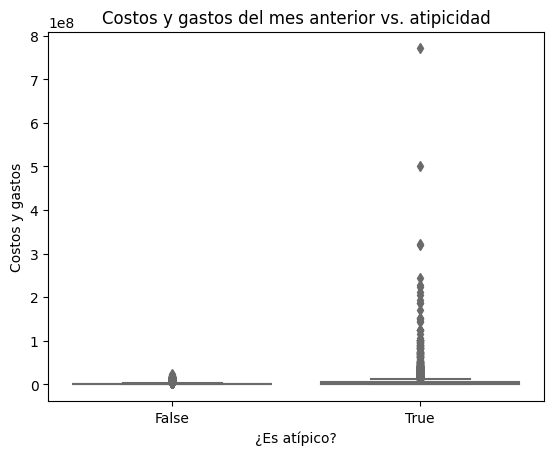

In [74]:
sns.boxplot(x = 'ATPC', y = 'CYG', data = emicron_estab,
             palette= sns.color_palette("Set3"))
plt.title("Costos y gastos del mes anterior vs. atipicidad")
plt.ylabel("Costos y gastos")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

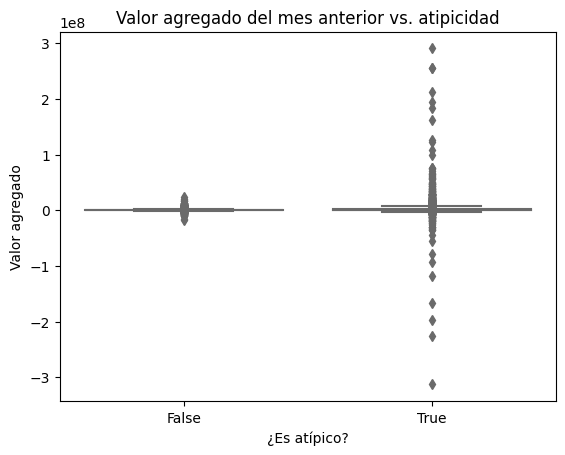

In [76]:
sns.boxplot(x = 'ATPC', y = 'VA', data = emicron_estab,
             palette= sns.color_palette("Set3"))
plt.title("Valor agregado del mes anterior vs. atipicidad")
plt.ylabel("Valor agregado")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

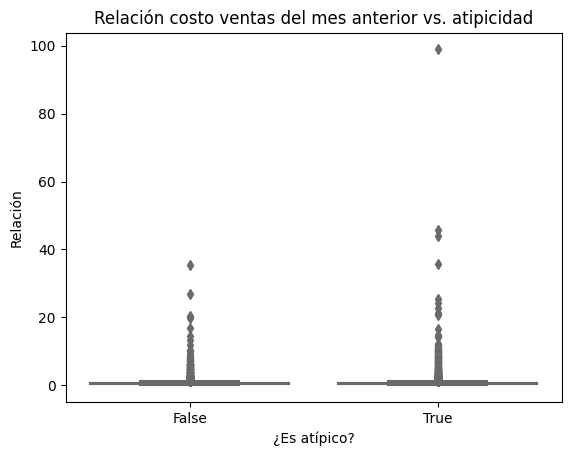

In [79]:
sns.boxplot(x = 'ATPC', y = 'coef_g', data = emicron_estab,
             palette= sns.color_palette("Set3"))
plt.title("Relación costo ventas del mes anterior vs. atipicidad")
plt.ylabel("Relación")
plt.xlabel("¿Es atípico?")

In [ ]:
descriptions = {}

for est in emicron_estab['ATPC'].unique():
       descriptions[est] = emicron_estab['VENTAS_MES_ANTERIOR'][emicron_estab['ATPC'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000

#descriptions_df.rename(columns=dic_sector,inplace=True)
print(descriptions_df)

              False          True
count     16.020000  6.762000e+00
mean    2428.369419  8.262979e+03
std     2634.339496  2.371044e+04
min        4.000000  9.000000e+00
25%      830.000000  1.000000e+03
50%     1600.000000  3.000000e+03
75%     3000.000000  8.000000e+03
max    25000.000000  1.061429e+06


In [66]:
descriptions = {}

for var in ['VENTAS_MES_ANTERIOR','CYG','VA','coef_g']:
    for est in emicron_estab['ATPC'].unique():
        descriptions[est] = emicron_estab[var][emicron_estab['ATPC'] == est].describe()

    # Convert the dictionary to a DataFrame
    descriptions_df = pd.DataFrame(descriptions)
    descriptions_df = descriptions_df/1000

    #descriptions_df.rename(columns=dic_sector,inplace=True)
    #print(descriptions_df)

    descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\estab_"+var+"_atpcs_normal.xlsx")

              False          True
count     16.020000  6.762000e+00
mean    2428.369419  8.262979e+03
std     2634.339496  2.371044e+04
min        4.000000  9.000000e+00
25%      830.000000  1.000000e+03
50%     1600.000000  3.000000e+03
75%     3000.000000  8.000000e+03
max    25000.000000  1.061429e+06
              False           True
count     16.020000       6.762000
mean    1541.800889    5824.427470
std     2069.929463   18150.272525
min        0.000000       0.000000
25%      347.000000     485.250000
50%      850.000000    1746.000000
75%     1880.000000    5310.000000
max    24760.000000  770910.000000
              False           True
count     16.020000       6.762000
mean     886.568529    2438.551456
std     1159.143850   11258.602958
min   -17285.646000 -312816.000000
25%      300.000000     300.000000
50%      670.000000     965.500000
75%     1190.000000    2853.840500
max    24500.000000  290518.571000
           False      True
count  16.020000  6.762000
mean    0.

In [10]:
cross_tab_prop = pd.crosstab(emicron_estab['GRUPOS4'],
                             emicron_estab['ATPC'],
                             normalize= "index")

#cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_sector,inplace=True)
cross_tab_prop

ATPC,False,True
GRUPOS4,,
Industria,0.540779,0.459221
Comercio,0.742408,0.257592
Servicios,0.715014,0.284986


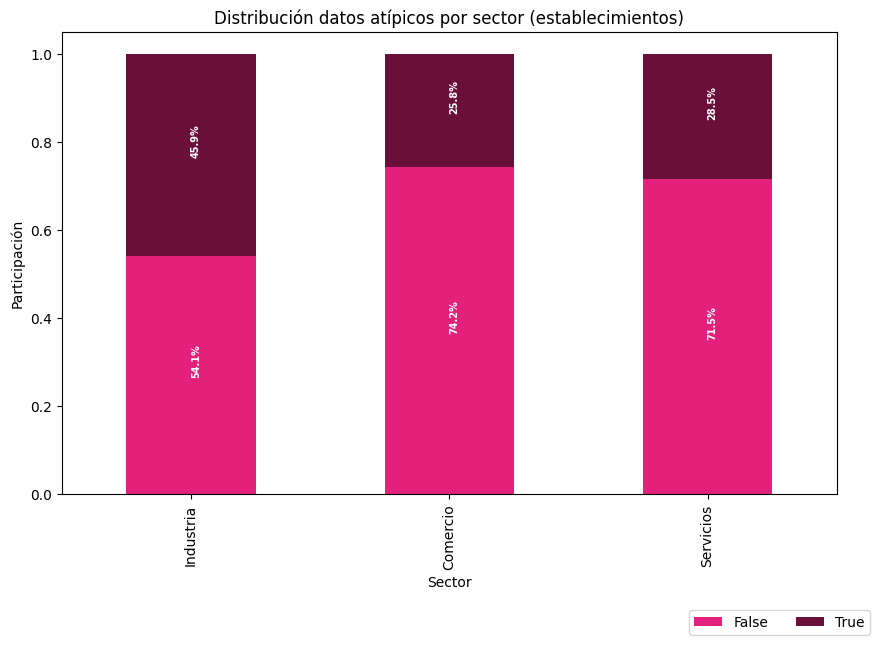

In [110]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Sector")
plt.ylabel("Participación")
plt.title("Distribución datos atípicos por sector (establecimientos)")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical'
                 ,fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

In [11]:
cross_tab_prop = pd.crosstab(emicron_estab['COD_DEPTO'],
                             emicron_estab['ATPC'])#,
 #                            normalize= "index")

#cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)
cross_tab_prop

ATPC,False,True
COD_DEPTO,,
Antioquia,1027,331
Atlántico,767,279
"Bogotá, D. C.",0,443
Bolívar,738,201
Boyacá,444,261
Caldas,532,275
Caquetá,908,204
Cauca,344,367
Cesar,144,473


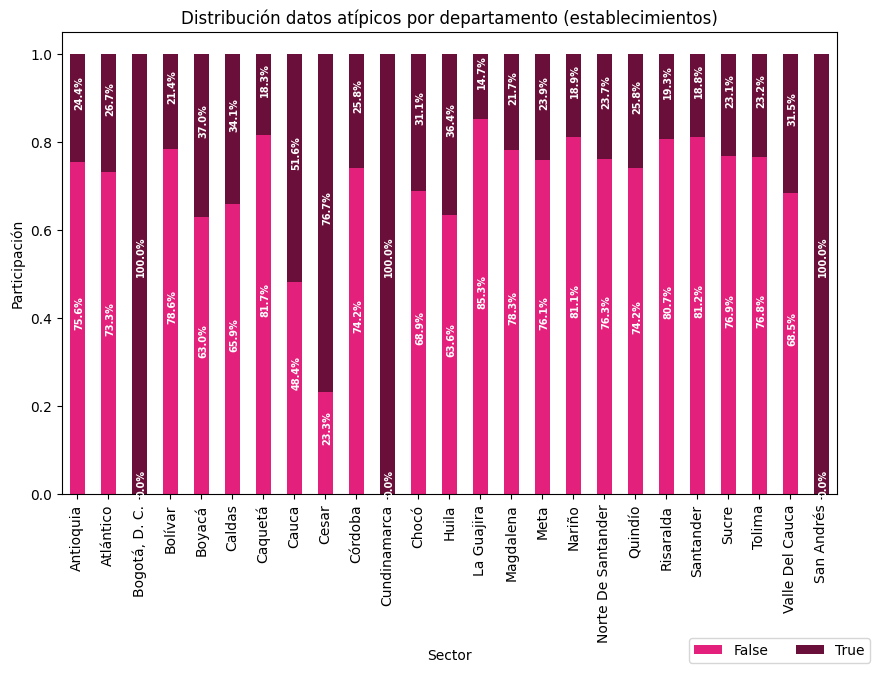

In [129]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Sector")
plt.ylabel("Participación")
plt.title("Distribución datos atípicos por departamento (establecimientos)")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical'
                 ,fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.38),
          fancybox=True, shadow=False, ncol=5)

plt.show()

Text(0.5, 0, '¿Es atípico?')

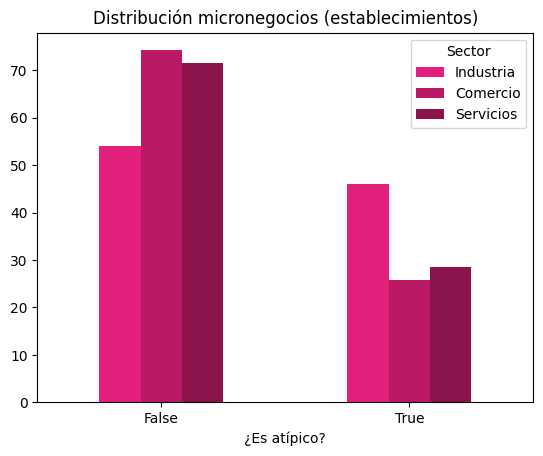

In [93]:
colors = ['#E3207B', '#BA1A65', '#8C144C']
#,'#690F39'

cross_tab_prop.plot(x="Atípico", y=["Industria", "Comercio", "Servicios"], kind="bar", rot=0,
                    color = colors)
plt.legend().set_title("Sector")
plt.title("Distribución micronegocios (establecimientos)")
plt.xlabel("¿Es atípico?")

#### Puestos móviles

In [23]:
mov_atpcs = pd.read_excel(os.path.join(data_path,"Resultados\cluster_atipico_moviles.xlsx"),header = 0)

In [35]:
mov_atpcs['nivel_atipico'].value_counts()

1    387
2    152
4    110
3     92
5     20
Name: nivel_atipico, dtype: int64

In [27]:
mov_atpcs['VA'] = mov_atpcs['VENTAS_MES_ANTERIOR'] - mov_atpcs['CYG']
mov_atpcs['coef_g'] = mov_atpcs['CYG'] / mov_atpcs['VENTAS_MES_ANTERIOR']

In [29]:
descriptions = {}

for est in mov_atpcs['cluster'].unique():
    descriptions[est] = mov_atpcs['VENTAS_MES_ANTERIOR'][mov_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
#print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\mov_ventas_clu_atpcs.xlsx")

In [30]:
descriptions = {}

for est in mov_atpcs['cluster'].unique():
    descriptions[est] = mov_atpcs['CYG'][mov_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
#print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\mov_cyg_clu_atpcs.xlsx")

In [31]:
descriptions = {}

for est in mov_atpcs['cluster'].unique():
    descriptions[est] = mov_atpcs['VA'][mov_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
#print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\mov_VA_clu_atpcs.xlsx")

In [33]:
descriptions = {}

for est in mov_atpcs['cluster'].unique():
    descriptions[est] = mov_atpcs['coef_g'][mov_atpcs['cluster'] == est].describe()

# Convert the dictionary to a DataFrame
descriptions_df = pd.DataFrame(descriptions)
#descriptions_df = descriptions_df/1000
descriptions_df = descriptions_df[[0,1,2,3,4,5,6,7,8,9]]

#descriptions_df.rename(columns=dic_sector,inplace=True)
#print(descriptions_df)

descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\mov_coefg_clu_atpcs.xlsx")

In [117]:
# Abrir archivo
emicron_mov = pd.read_csv(os.path.join(data_path,"emicron_moviles.csv"),header = 0)
emicron_mov = emicron_mov[emicron_mov['OLA']==2022]

# Crear variable de si es atípico o no
emicron_mov['ATPC'] = emicron_mov['id'].isin(mov_atpcs['id'])

# Creación variables
emicron_mov['VA'] = emicron_mov['VENTAS_MES_ANTERIOR'] - emicron_mov['CYG']
emicron_mov['coef_g'] = emicron_mov['CYG'] / emicron_mov['VENTAS_MES_ANTERIOR']

In [118]:
cross_tab_prop = pd.crosstab(emicron_mov['GRUPOS4'],
                             emicron_mov['ATPC'],
                             normalize= "index")

#cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_sector,inplace=True)
cross_tab_prop

ATPC,False,True
GRUPOS4,,
Industria,0.078740,0.921260
Comercio,0.770847,0.229153
Servicios,0.790185,0.209815


In [113]:
emicron_mov['ATPC'].value_counts()

False    2295
True      761
Name: ATPC, dtype: int64

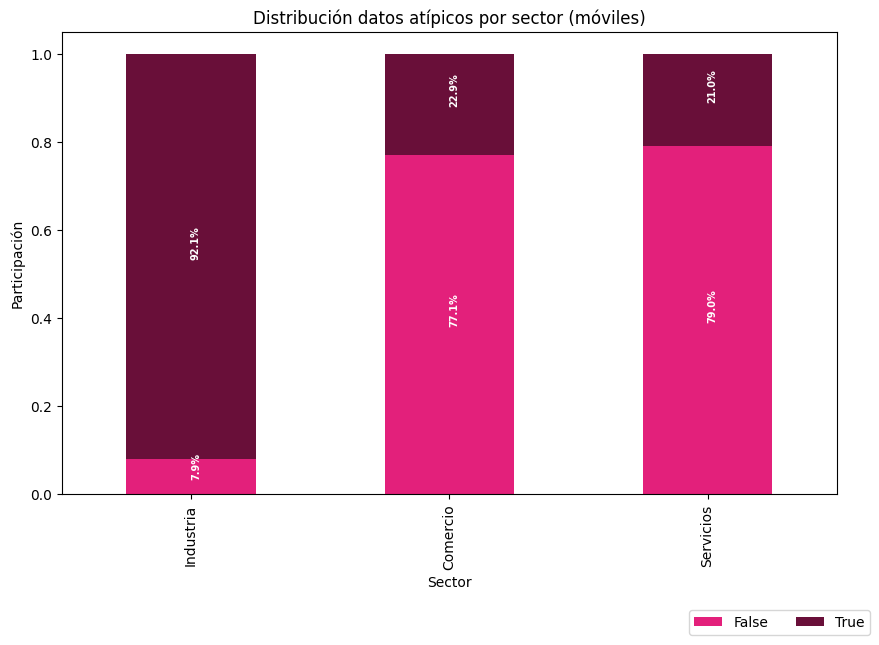

In [120]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Sector")
plt.ylabel("Participación")
plt.title("Distribución datos atípicos por sector (móviles)")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical'
                 ,fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.32),
          fancybox=True, shadow=False, ncol=5)

plt.show()

In [130]:
cross_tab_prop = pd.crosstab(emicron_mov['COD_DEPTO'],
                             emicron_mov['ATPC'],
                             normalize= "index")

#cross_tab_prop.rename(columns=dic_sector,inplace=True)
cross_tab_prop.rename(index=dic_depto,inplace=True)
cross_tab_prop

ATPC,False,True
COD_DEPTO,,
Antioquia,0.848606,0.151394
Atlántico,0.732719,0.267281
"Bogotá, D. C.",0.000000,1.000000
Bolívar,0.858586,0.141414
Boyacá,0.000000,1.000000
Caldas,0.936000,0.064000
Caquetá,0.881890,0.118110
Cauca,0.775281,0.224719
Cesar,0.780488,0.219512


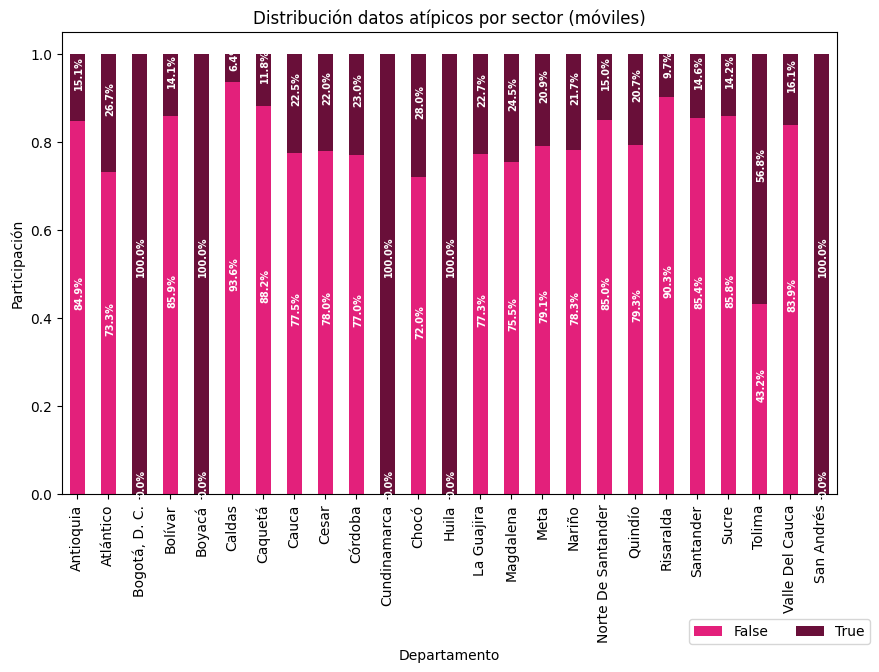

In [133]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap=custom_cmap2,
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=3)
plt.xlabel("Departamento")
plt.ylabel("Participación")
plt.title("Distribución datos atípicos por sector (móviles)")

for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.1,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="white",
                 fontsize=7,
                 rotation = 'vertical'
                 ,fontweight="bold")
        
# Put a legend below current axis
plt.legend(loc='lower left', bbox_to_anchor=(0.8, -0.34),
          fancybox=True, shadow=False, ncol=5)

plt.show()

In [134]:
descriptions = {}

for var in ['VENTAS_MES_ANTERIOR','CYG','VA','coef_g']:
    for est in emicron_mov['ATPC'].unique():
        descriptions[est] = emicron_mov[var][emicron_mov['ATPC'] == est].describe()

    # Convert the dictionary to a DataFrame
    descriptions_df = pd.DataFrame(descriptions)
    descriptions_df = descriptions_df/1000

    #descriptions_df.rename(columns=dic_sector,inplace=True)
    #print(descriptions_df)

    descriptions_df.to_excel(r"D:\DANE - Contrato\2024\Operativo Barrido\Documentos\Resultados\Tablas\mov_"+var+"_atpcs_normal.xlsx")

Text(0.5, 0, '¿Es atípico?')

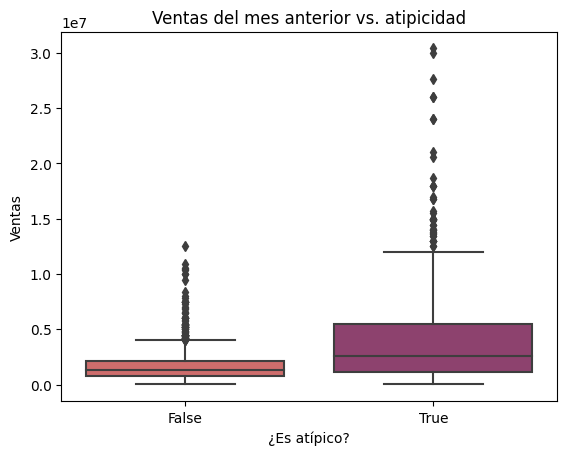

In [138]:
sns.boxplot(x = 'ATPC', y = 'VENTAS_MES_ANTERIOR', data = emicron_mov,
             palette= 'flare')
plt.title("Ventas del mes anterior vs. atipicidad")
plt.ylabel("Ventas")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

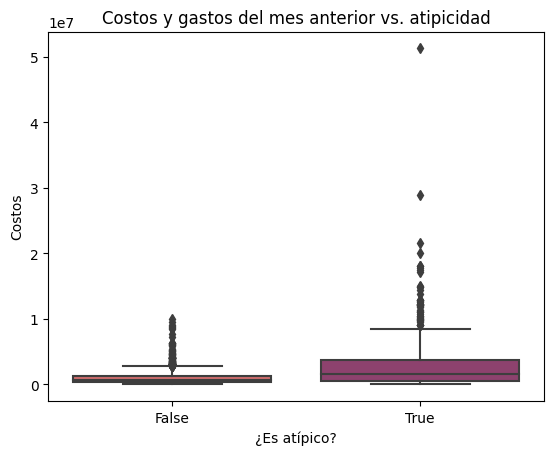

In [139]:
sns.boxplot(x = 'ATPC', y = 'CYG', data = emicron_mov,
             palette= 'flare')
plt.title("Costos y gastos del mes anterior vs. atipicidad")
plt.ylabel("Costos")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

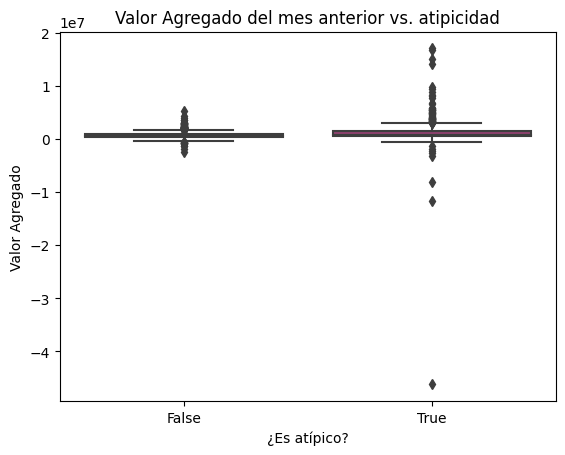

In [141]:
sns.boxplot(x = 'ATPC', y = 'VA', data = emicron_mov,
             palette= 'flare')
plt.title("Valor Agregado del mes anterior vs. atipicidad")
plt.ylabel("Valor Agregado")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

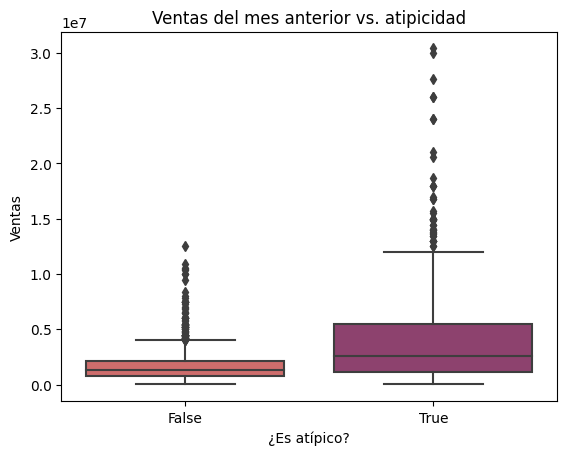

In [ ]:
sns.boxplot(x = 'ATPC', y = 'VENTAS_MES_ANTERIOR', data = emicron_mov,
             palette= 'flare')
plt.title("Ventas del mes anterior vs. atipicidad")
plt.ylabel("Ventas")
plt.xlabel("¿Es atípico?")

Text(0.5, 0, '¿Es atípico?')

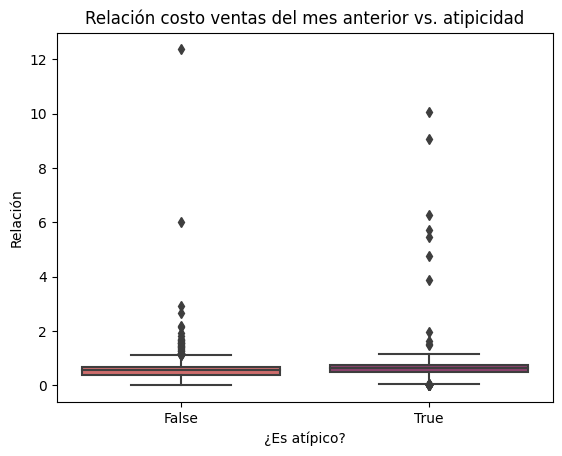

In [142]:
sns.boxplot(x = 'ATPC', y = 'coef_g', data = emicron_mov,
             palette= 'flare')
plt.title("Relación costo ventas del mes anterior vs. atipicidad")
plt.ylabel("Relación")
plt.xlabel("¿Es atípico?")